<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/de_grafos_a_models_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para representar grafos en Python, puedes usar una biblioteca como NetworkX. Esta biblioteca permite crear, manipular y estudiar la estructura, dinámica y funciones de redes complejas.

Ejemplo de cómo se puede representar un grafo en Python usando NetworkX:

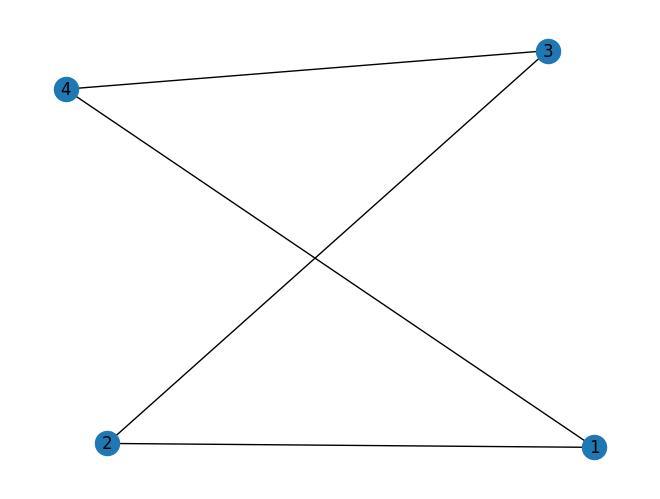

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos al grafo
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)

# Añadir bordes al grafo
G.add_edge(1, 2)
G.add_edge(3, 4)
G.add_edge(2, 3)
G.add_edge(1, 4)

# Dibujar el grafo
nx.draw(G, with_labels=True)
plt.show()


 En teoría de grafos, a menudo se utiliza una estructura de datos llamada "matriz de adyacencia" para representar las conexiones o bordes entre nodos. Una matriz de adyacencia es una matriz cuadrada donde la celda en la i-ésima fila y la j-ésima columna indica si hay un borde del nodo i al nodo j.

Para un grafo no dirigido sin pesos, la matriz de adyacencia sólo contiene ceros y unos, donde un "1" indica la presencia de un borde y un "0" indica su ausencia. Para un grafo ponderado, los pesos de los bordes se indican en lugar de simplemente "1". En un grafo no dirigido, la matriz de adyacencia es simétrica alrededor de la diagonal principal.

Aquí hay un ejemplo de cómo crear una matriz de adyacencia en Python para un grafo simple utilizando NetworkX:

[[0 1 1 0 0 0]
 [1 0 0 1 1 0]
 [1 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]]


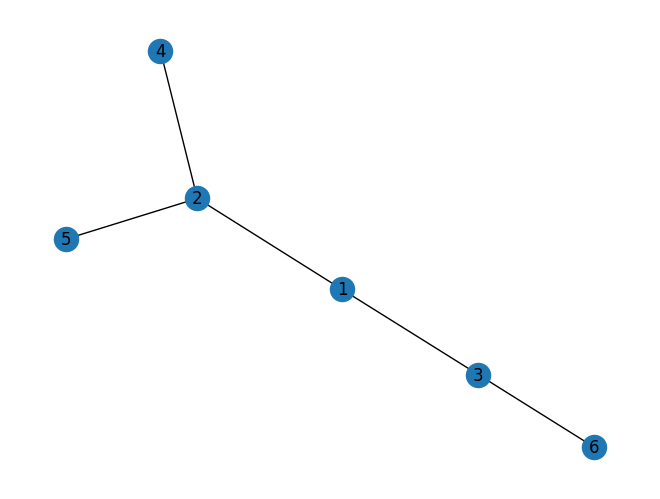

In [ ]:
import networkx as nx
import numpy as np

# Crear un grafo
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 6)])

# Obtener la matriz de adyacencia (como una matriz de NumPy)
adjacency_matrix = nx.adjacency_matrix(G).todense()

print(adjacency_matrix)
nx.draw(G, with_labels=True)
plt.show()

un tipo específico de grafo llamado "grafo dirigido acíclico" o DAG por sus siglas en inglés (Directed Acyclic Graph). Un DAG es un tipo de grafo que tiene una dirección para cada borde y no contiene ningún ciclo. En un DAG, puedes definir un orden topológico, lo que significa que puedes ordenar los nodos de manera que todas las aristas vayan de nodos anteriores a nodos posteriores.

En el caso de un DAG, puedes tener un nodo de inicio (llamado "nodo fuente") desde el cual todas las conexiones emanan, y un nodo de finalización (llamado "nodo sumidero") donde todas las conexiones terminan. No todos los grafos tienen esta propiedad, pero puedes asegurarte de que tu grafo la tenga construyendo explícitamente un DAG con un nodo fuente y un nodo sumidero.

Aquí hay un ejemplo de cómo podrías hacer esto en Python usando la biblioteca NetworkX:

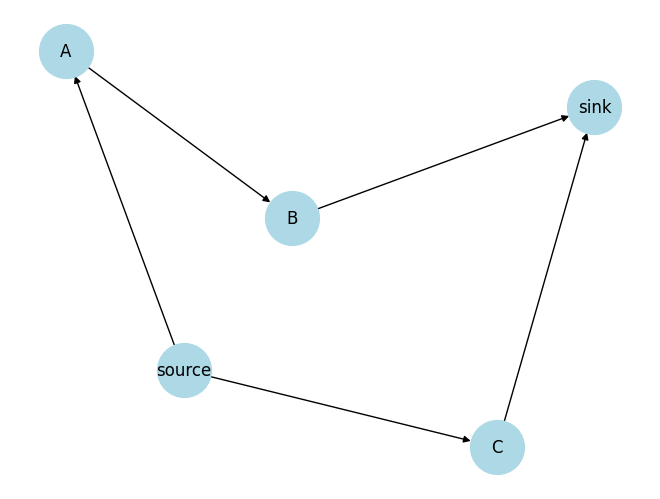

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo dirigido
G = nx.DiGraph()


# Añadir nodos y bordes al grafo
G.add_edge("source", "A")
G.add_edge("A", "B")
G.add_edge("B", "sink")
G.add_edge("source", "C")
G.add_edge("C", "sink")


# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500)
plt.show()



Para crear un grafo dirigido acíclico (DAG) aleatorio en Python, puedes usar la biblioteca NetworkX. Aquí hay una manera de hacerlo:

Comienza creando un grafo dirigido vacío.
Añade los nodos que deseas.
Añade aristas entre los nodos de manera que mantengan la propiedad de aciclicidad. Puedes hacerlo, por ejemplo, añadiendo una arista desde un nodo a otro solo si el nodo origen tiene un índice más bajo que el nodo destino.
Aquí tienes un ejemplo de cómo hacerlo:

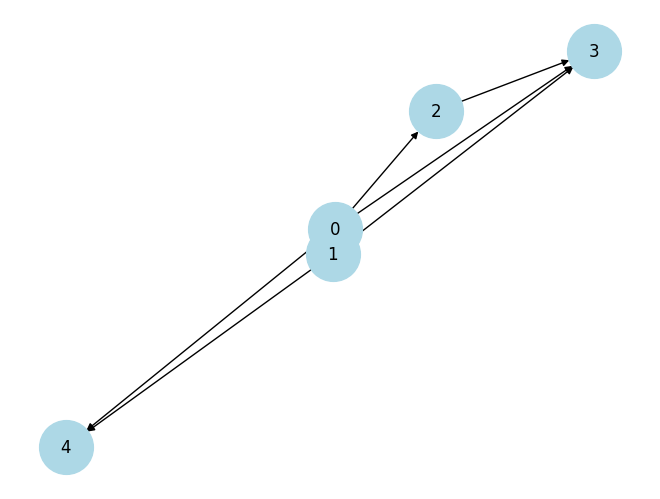

[[0 1 1 1 1]
 [0 0 0 1 1]
 [0 0 0 1 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt

# Número de nodos
N = 5

# Crear un grafo dirigido vacío
G = nx.DiGraph()

# Añadir nodos al grafo
G.add_nodes_from(range(N))

# Añadir aristas manteniendo la propiedad de aciclicidad
for node in G.nodes:
    # Posibles nodos a los que se puede conectar (nodos con índice mayor)
    possible_nodes = [n for n in range(node+1, N)]

    # Elegir aleatoriamente el número de conexiones para este nodo
    num_connections = random.choice(range(len(possible_nodes) + 1))

    # Elegir aleatoriamente a qué nodos conectar
    connections = random.sample(possible_nodes, num_connections)

    # Añadir las aristas
    for connection in connections:
        G.add_edge(node, connection)

# Dibujar el grafo
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500)
plt.show()

adjacency_matrix = nx.adjacency_matrix(G).todense()
print(adjacency_matrix)

In [ ]:
for g in nx.topological_sort(G):
  print(g)

0
2
1
4
3


Para construir un modelo en Keras que siga una estructura de grafo, podemos usar la API funcional de Keras. A continuación se muestra una función que crea un modelo de este tipo basado en un grafo dirigido acíclico (DAG).

In [292]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

def create_model_from_graph(graph, input_shape):
    # Crear una capa de entrada para el modelo
    input_layer = Input(shape=input_shape)

    # Crear un diccionario para almacenar las salidas de las capas para cada nodo
    node_outputs = {}

    # Procesar los nodos en orden topológico
    for node in nx.topological_sort(graph):
        node_input = None

        # Si el nodo no tiene predecesores, su entrada es la capa de entrada del modelo
        if graph.in_degree(node) == 0:
            node_input = input_layer
        else:
            # Si el nodo tiene predecesores, su entrada es la concatenación de las salidas de sus predecesores
            node_input = concatenate([node_outputs[predecessor] for predecessor in graph.predecessors(node)])

        # Crear una capa densa para el nodo
        node_output = Dense(5, activation='relu')(node_input)

        # Almacenar la salida de la capa para este nodo
        node_outputs[node] = node_output

    # La salida del modelo es la salida de la última capa creada
    model_output = list(node_outputs.values())[-1]

    # Crear el modelo de Keras
    model = Model(inputs=input_layer, outputs=model_output)

    return model
"""
# Ejemplo de uso:
G = nx.DiGraph()
G.add_edges_from([(0, 1), (0, 2), (1, 3), (2, 3)])

model = create_model_from_graph(G, (32,))
model.compile(optimizer='adam', loss='mse')
"""

"\n# Ejemplo de uso:\nG = nx.DiGraph()\nG.add_edges_from([(0, 1), (0, 2), (1, 3), (2, 3)])\n\nmodel = create_model_from_graph(G, (32,))\nmodel.compile(optimizer='adam', loss='mse')\n"

In [ ]:
#G = nx.DiGraph()
#G.add_edges_from([(0, 1), (0, 2), (1, 3), (2, 3)])

model = create_model_from_graph(G, (32,))
model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense_32 (Dense)               (None, 5)            165         ['input_9[0][0]']                
                                                                                                  
 concatenate_10 (Concatenate)   (None, 5)            0           ['dense_32[0][0]']               
                                                                                                  
 dense_33 (Dense)               (None, 5)            30          ['concatenate_10[0][0]']         
                                                                                            

-----------------------

# REGLAS MATRIZ GRAFO PARA MODELO NEURONAL FUNCIONAL / NO SECUENCIAL

- la primera columna y la ultima fila son ceros

- los valores por debajo de la diagonal son cero

- las valores de la diagonal son cero

- en todas las columnas y filas restantes, repentando siempre las relgas previas, debe tener un uno

0
1
2
3
4


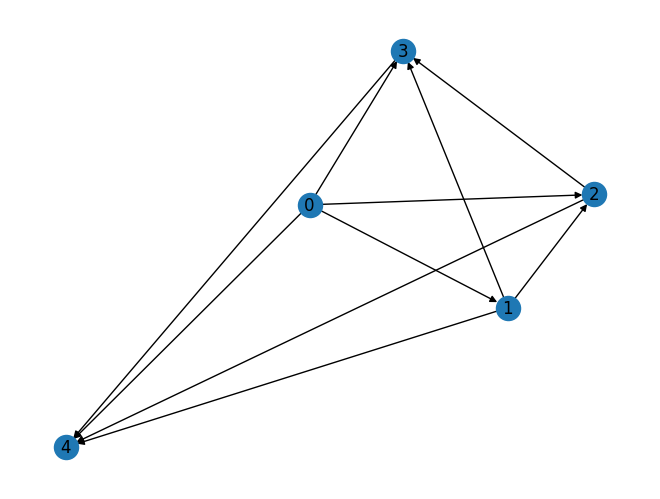

In [282]:
import networkx as nx
import numpy as np
# Define la matriz de adyacencia como una lista de listas
adjacency_matrix = [
    [0, 1, 1, 1, 1],
    [0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
]

# Crea un grafo a partir de la matriz de adyacencia
G = nx.from_numpy_array(np.array(adjacency_matrix), create_using=nx.DiGraph)

# Dibujar el grafo
nx.draw(G, with_labels=True)

for g in nx.topological_sort(G):
  print(g)

In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [258]:
np.concatenate( (
    np.array([0]) ,
    np.where(np.random.rand(4) > 0.5, 1, 0)
    ) )

array([0, 1, 1, 0, 1])

In [263]:
# prueba de concepto , no es suficiente...
adjacency_matrix = [
    np.concatenate((  np.array([0]) , np.where(np.random.rand(4) > 0.5, 1, 0)  )),
    np.concatenate((  np.array([0,0]) , np.where(np.random.rand(3) > 0.5, 1, 0)  )),
    np.concatenate((  np.array([0,0,0]) , np.where(np.random.rand(2) > 0.5, 1, 0)  )),
    np.concatenate((  np.array([0,0,0,0]) , np.where(np.random.rand(1) > 0.5, 1, 0)  )),
    np.array([0,0,0,0,0]),
]
adjacency_matrix

[array([0, 1, 1, 1, 1]),
 array([0, 0, 1, 1, 0]),
 array([0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0])]

# GENERAR CONEXIONES ALEATORIAS CON DISTRIBUCION UNIFORME

In [153]:
h = []
for i in range(10000):
  num_ones = np.random.randint(1, 5)
  array = np.array([1]*num_ones + [0]*(4-num_ones))
  np.random.shuffle(array)
  h.append(array.sum())

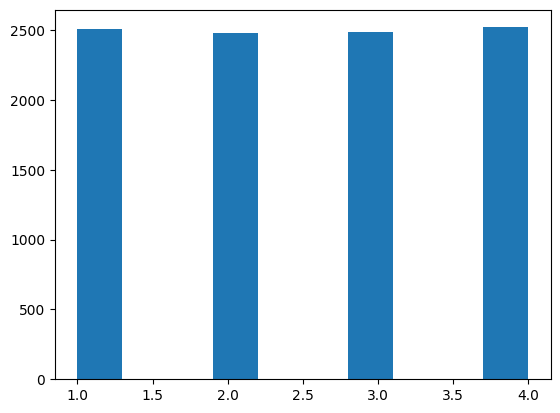

In [154]:
plt.hist(h);

In [231]:

n_neuronas = 6
# Genera un número aleatorio entre 1 y n_neuronas
num_ones = np.random.randint(1, n_neuronas + 1)
print(num_ones)


4


In [232]:
[1]*num_ones

[1, 1, 1, 1]

In [233]:
[0]*(n_neuronas-num_ones)

[0, 0]

In [234]:
[1]*num_ones + [0]*(n_neuronas-num_ones)

[1, 1, 1, 1, 0, 0]

In [235]:
# Crea un array con 'num_ones' unos y el resto ceros
array = np.array([1]*num_ones + [0]*(n_neuronas-num_ones))
print(array)


[1 1 1 1 0 0]


In [236]:
# Mezcla aleatoriamente el array
np.random.shuffle(array)
print(array)

[0 1 1 1 1 0]


## def crear_fila_conexiones(n)

In [242]:
def crear_fila_conexiones(n):
  num_ones = np.random.randint(1, n + 1)
  array = np.array([1]*num_ones + [0]*(n-num_ones))
  np.random.shuffle(array)
  return array

In [249]:
crear_fila_conexiones(3)

array([0, 0, 1])

In [290]:
adjacency_matrix = [
    np.concatenate((  np.array([0]) , crear_fila_conexiones(4) )),
    np.concatenate((  np.array([0,0]) , crear_fila_conexiones(3)  )),
    np.concatenate((  np.array([0,0,0]) , crear_fila_conexiones(2)  )),
    np.concatenate((  np.array([0,0,0,0]) , crear_fila_conexiones(1)  )),
    np.array([0,0,0,0,0]),
]
adjacency_matrix

[array([0, 1, 1, 1, 1]),
 array([0, 0, 0, 1, 1]),
 array([0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0])]

# VISUALIZACION :  MATRIZ - GRAFO - MODELO

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32)]         0           []                               
                                                                                                  
 dense_25 (Dense)               (None, 5)            165         ['input_6[0][0]']                
                                                                                                  
 concatenate_16 (Concatenate)   (None, 5)            0           ['dense_25[0][0]']               
                                                                                                  
 dense_27 (Dense)               (None, 5)            30          ['concatenate_16[0][0]']         
                                                                                            

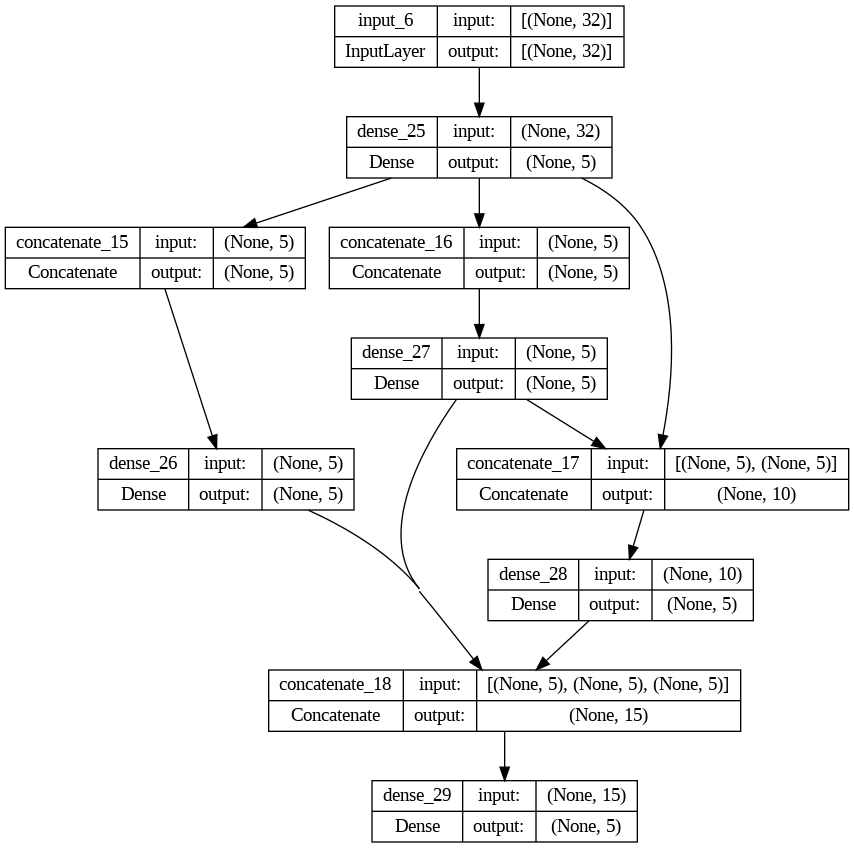

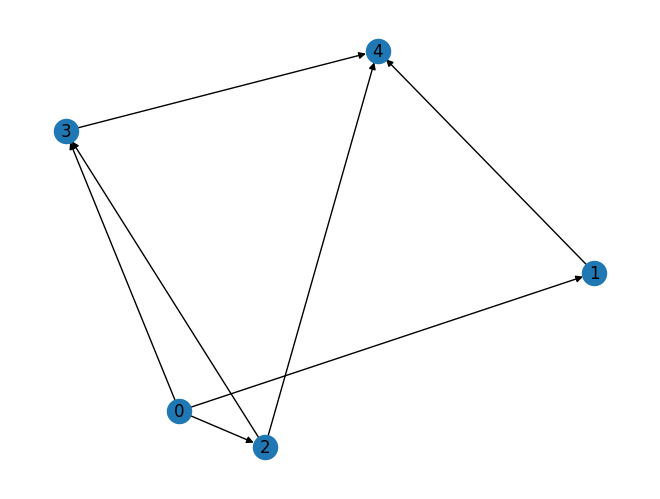

In [298]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

adjacency_matrix = [
  np.concatenate((  np.array([0]) , crear_fila_conexiones(4) )),
  np.concatenate((  np.array([0,0]) , crear_fila_conexiones(3)  )),
  np.concatenate((  np.array([0,0,0]) , crear_fila_conexiones(2)  )),
  np.concatenate((  np.array([0,0,0,0]) , crear_fila_conexiones(1)  )),
  np.array([0,0,0,0,0]),
]

# Crea un grafo a partir de la matriz de adyacencia
G = nx.from_numpy_array(np.array(adjacency_matrix), create_using=nx.DiGraph)

# Dibujar el grafo
nx.draw(G, with_labels=True)

# Crea un grafo a partir de la matriz de adyacencia
G = nx.from_numpy_array(np.array(adjacency_matrix), create_using=nx.DiGraph)
model = create_model_from_graph(G, (32,))
model.summary()

# Asumiendo que 'model' es tu modelo Keras
plot_model(model, show_shapes=True, show_layer_names=True)

# TEST N

In [301]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

for i in range(1000):
  adjacency_matrix = [
    np.concatenate((  np.array([0]) , crear_fila_conexiones(4) )),
    np.concatenate((  np.array([0,0]) , crear_fila_conexiones(3)  )),
    np.concatenate((  np.array([0,0,0]) , crear_fila_conexiones(2)  )),
    np.concatenate((  np.array([0,0,0,0]) , crear_fila_conexiones(1)  )),
    np.array([0,0,0,0,0]),
  ]

  # Crea un grafo a partir de la matriz de adyacencia
  G = nx.from_numpy_array(np.array(adjacency_matrix), create_using=nx.DiGraph)

  # Crea un grafo a partir de la matriz de adyacencia
  G = nx.from_numpy_array(np.array(adjacency_matrix), create_using=nx.DiGraph)
  model = create_model_from_graph(G, (32,))

print("EXITOS: " + str(i))


EXITOS: 999
